In [1]:
#Importing Necessary Libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from keras.models import Sequential  # For creating sequential neural network models
from keras.layers import Dense  # For adding layers to the neural network
from keras.callbacks import EarlyStopping  # For early stopping during training
import matplotlib.pyplot as plt  # For data visualization

In [2]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ifood_df.csv")

In [3]:
# Split features and target variable
X = data.drop(columns=["Response"])  # Features
y = data["Response"]  # Target variable

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Data preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training features
X_test_scaled = scaler.transform(X_test)        # Scale testing features

In [6]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))                                     # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(1, activation='sigmoid'))                                   # Output layer with sigmoid activation for binary classification


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Early stopping to prevent overfitting
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
45/45 [==============================] - 1s 7ms/step - loss: 0.4982 - accuracy: 0.7789 - val_loss: 0.4016 - val_accuracy: 0.8499
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.8788 - val_loss: 0.3473 - val_accuracy: 0.8584
Epoch 3/50
45/45 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.8930 - val_loss: 0.3174 - val_accuracy: 0.8725
Epoch 4/50
45/45 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.9050 - val_loss: 0.3025 - val_accuracy: 0.8725
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.9100 - val_loss: 0.2995 - val_accuracy: 0.8782
Epoch 6/50
45/45 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9135 - val_loss: 0.3015 - val_accuracy: 0.8782
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9164 - val_loss: 0.3067 - val_accuracy: 0.8584
Epoch 8/50
45/45 [==

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

14/14 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.8934
Test Loss: 0.264812707901001
Test Accuracy: 0.8934240341186523


In [10]:
# Optionally, you can plot training history
import matplotlib.pyplot as plt

In [11]:
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

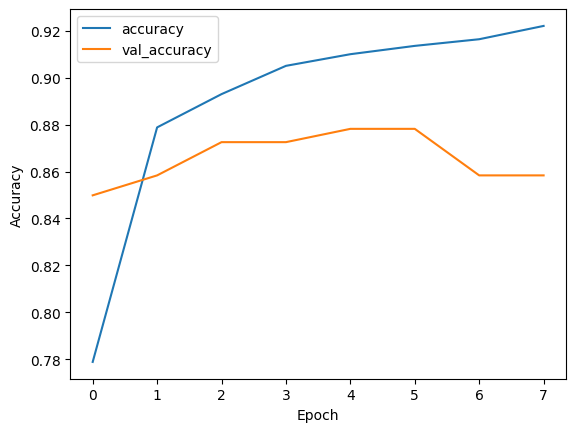

In [12]:
plot_history(history)